In [31]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

# Rain Prediction

In [32]:
df = pd.read_csv('Rain Prediction Train.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27-01-2013,AliceSprings,17.6,34.4,0.0,15.6,12.9,SE,44.0,SE,...,19.0,11.0,1011.1,1006.4,1.0,1.0,25.6,33.5,No,No
99996,14-08-2010,Melbourne,10.2,15.9,0.0,3.8,3.8,N,89.0,N,...,55.0,46.0,1007.4,1000.7,7.0,7.0,12.7,15.5,No,No
99997,26-10-2015,SydneyAirport,17.1,26.4,0.0,7.0,5.2,W,85.0,N,...,50.0,58.0,1014.3,1014.4,3.0,7.0,25.0,21.6,No,Yes
99998,06-04-2012,Albany,NaN,17.9,0.8,3.8,2.1,NaN,NaN,NaN,...,NaN,NaN,1029.5,1027.8,NaN,NaN,NaN,NaN,No,No


In [33]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            436
MaxTemp            216
Rainfall           970
Evaporation      42633
Sunshine         47482
WindGustDir       6581
WindGustSpeed     6540
WindDir9am        7062
WindDir3pm        2691
WindSpeed9am       938
WindSpeed3pm      1854
Humidity9am       1238
Humidity3pm       2544
Pressure9am       9837
Pressure3pm       9812
Cloud9am         37628
Cloud3pm         40011
Temp9am            620
Temp3pm           1910
RainToday          970
RainTomorrow         0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           100000 non-null  object 
 1   Location       100000 non-null  object 
 2   MinTemp        100000 non-null  float64
 3   MaxTemp        100000 non-null  float64
 4   Rainfall       100000 non-null  float64
 5   Evaporation    100000 non-null  float64
 6   Sunshine       100000 non-null  float64
 7   WindGustDir    100000 non-null  object 
 8   WindGustSpeed  100000 non-null  float64
 9   WindDir9am     100000 non-null  object 
 10  WindDir3pm     100000 non-null  object 
 11  WindSpeed9am   100000 non-null  float64
 12  WindSpeed3pm   100000 non-null  float64
 13  Humidity9am    100000 non-null  float64
 14  Humidity3pm    100000 non-null  float64
 15  Pressure9am    100000 non-null  float64
 16  Pressure3pm    100000 non-null  float64
 17  Cloud9am       100000 non-null

# Cleaning Data

**Replace Data yang Kosong dengan Rata-rata**

- Replace Number Value by Mean

In [35]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [36]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6581
WindGustSpeed       0
WindDir9am       7062
WindDir3pm       2691
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         970
RainTomorrow        0
dtype: int64

- Replace Text by Most Text

In [37]:
df['WindGustDir'].value_counts()

W      6857
SE     6508
E      6405
SSE    6320
WSW    6268
N      6240
S      6231
SW     6193
SSW    6088
ENE    5689
WNW    5667
NW     5665
ESE    5156
NE     4973
NNW    4639
NNE    4520
Name: WindGustDir, dtype: int64

In [38]:
df['WindGustDir'].fillna('W', inplace = True)

In [39]:
df['WindDir9am'].value_counts()

N      7996
SE     6421
E      6364
SSE    6317
NW     6069
S      5985
SW     5773
W      5743
NNE    5551
NNW    5502
ENE    5406
ESE    5372
NE     5296
SSW    5272
WNW    5058
WSW    4813
Name: WindDir9am, dtype: int64

In [40]:
df['WindDir9am'].fillna('N', inplace = True)

In [41]:
df['WindDir3pm'].value_counts()

SE     7568
W      6932
S      6707
WSW    6595
SW     6446
SSE    6430
N      6069
WNW    6061
NW     5997
ESE    5868
E      5777
NE     5742
SSW    5727
ENE    5444
NNW    5399
NNE    4547
Name: WindDir3pm, dtype: int64

In [42]:
df['WindDir3pm'].fillna('SE', inplace = True)

In [43]:
df['RainToday'].value_counts()

No     76973
Yes    22057
Name: RainToday, dtype: int64

In [44]:
df['RainToday'].fillna('No', inplace = True)

In [45]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [46]:
df.shape

(100000, 23)

# Analysis Data

# 1. Label Encoding

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           100000 non-null  object 
 1   Location       100000 non-null  object 
 2   MinTemp        100000 non-null  float64
 3   MaxTemp        100000 non-null  float64
 4   Rainfall       100000 non-null  float64
 5   Evaporation    100000 non-null  float64
 6   Sunshine       100000 non-null  float64
 7   WindGustDir    100000 non-null  object 
 8   WindGustSpeed  100000 non-null  float64
 9   WindDir9am     100000 non-null  object 
 10  WindDir3pm     100000 non-null  object 
 11  WindSpeed9am   100000 non-null  float64
 12  WindSpeed3pm   100000 non-null  float64
 13  Humidity9am    100000 non-null  float64
 14  Humidity3pm    100000 non-null  float64
 15  Pressure9am    100000 non-null  float64
 16  Pressure3pm    100000 non-null  float64
 17  Cloud9am       100000 non-null

In [63]:
df['Location'].unique()

array(['CoffsHarbour', 'Portland', 'Watsonia', 'Wollongong', 'Townsville',
       'Albany', 'Sale', 'Moree', 'Penrith', 'Dartmoor', 'Newcastle',
       'Ballarat', 'Bendigo', 'Woomera', 'Mildura', 'WaggaWagga',
       'Nuriootpa', 'MelbourneAirport', 'Walpole', 'Katherine',
       'Tuggeranong', 'MountGambier', 'Launceston', 'MountGinini',
       'Sydney', 'SalmonGums', 'GoldCoast', 'Witchcliffe', 'Darwin',
       'Nhil', 'BadgerysCreek', 'AliceSprings', 'Albury', 'PearceRAAF',
       'Canberra', 'Brisbane', 'Richmond', 'Hobart', 'Cobar',
       'SydneyAirport', 'Cairns', 'Adelaide', 'Melbourne', 'NorahHead',
       'Perth', 'NorfolkIsland', 'Williamtown', 'Uluru', 'PerthAirport'],
      dtype=object)

In [64]:
loc_rain = ['CoffsHarbour', 'Portland', 'Watsonia', 'Wollongong', 'Townsville',
       'Albany', 'Sale', 'Moree', 'Penrith', 'Dartmoor', 'Newcastle',
       'Ballarat', 'Bendigo', 'Woomera', 'Mildura', 'WaggaWagga',
       'Nuriootpa', 'MelbourneAirport', 'Walpole', 'Katherine',
       'Tuggeranong', 'MountGambier', 'Launceston', 'MountGinini',
       'Sydney', 'SalmonGums', 'GoldCoast', 'Witchcliffe', 'Darwin',
       'Nhil', 'BadgerysCreek', 'AliceSprings', 'Albury', 'PearceRAAF',
       'Canberra', 'Brisbane', 'Richmond', 'Hobart', 'Cobar',
       'SydneyAirport', 'Cairns', 'Adelaide', 'Melbourne', 'NorahHead',
       'Perth', 'NorfolkIsland', 'Williamtown', 'Uluru', 'PerthAirport']

In [65]:
enc = OrdinalEncoder(categories=[loc_rain])

In [66]:
df[['Location']] = enc.fit_transform(df[['Location']])

In [67]:
df['Location'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48.])

In [68]:
df['WindGustDir'].unique()

array(['NNE', 'WSW', 'SSW', 'ENE', 'W', 'E', 'SW', 'WNW', 'N', 'SSE', 'S',
       'SE', 'NNW', 'NW', 'NE', 'ESE'], dtype=object)

In [69]:
Wind_Gust = ['NNE', 'WSW', 'SSW', 'ENE', 'W', 'E', 'SW', 'WNW', 'N', 'SSE', 'S',
       'SE', 'NNW', 'NW', 'NE', 'ESE']

In [70]:
enc = OrdinalEncoder(categories=[Wind_Gust])

In [71]:
df[['WindGustDir']] = enc.fit_transform(df[['WindGustDir']])

In [72]:
df['WindGustDir'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [84]:
df['WindDir9am'].unique()

array(['SW', 'NE', 'SE', 'N', 'SSW', 'S', 'W', 'NNE', 'SSE', 'ENE', 'NNW',
       'NW', 'ESE', 'WNW', 'E', 'WSW'], dtype=object)

In [85]:
Wind_9am = ['NNE', 'WSW', 'SSW', 'ENE', 'W', 'E', 'SW', 'WNW', 'N', 'SSE', 'S',
       'SE', 'NNW', 'NW', 'NE', 'ESE']

In [86]:
enc = OrdinalEncoder(categories=[Wind_9am])

In [87]:
df[['WindDir9am']] = enc.fit_transform(df[['WindDir9am']])

In [88]:
df['WindDir9am'].unique()

array([ 6., 14., 11.,  8.,  2., 10.,  4.,  0.,  9.,  3., 12., 13., 15.,
        7.,  5.,  1.])

In [89]:
df['WindDir3pm'].unique()

array(['ESE', 'NNE', 'E', 'NE', 'NNW', 'SE', 'NW', 'S', 'SSW', 'W', 'N',
       'SSE', 'SW', 'WNW', 'WSW', 'ENE'], dtype=object)

In [90]:
Wind_3pm = ['NNE', 'WSW', 'SSW', 'ENE', 'W', 'E', 'SW', 'WNW', 'N', 'SSE', 'S',
       'SE', 'NNW', 'NW', 'NE', 'ESE']

In [91]:
enc = OrdinalEncoder(categories=[Wind_3pm])

In [92]:
df[['WindDir3pm']] = enc.fit_transform(df[['WindDir3pm']])

In [93]:
df['WindDir3pm'].unique()

array([15.,  0.,  5., 14., 12., 11., 13., 10.,  2.,  4.,  8.,  9.,  6.,
        7.,  1.,  3.])

In [94]:
df['RainToday'].unique()

array(['Yes', 'No'], dtype=object)

In [95]:
RainT = ['Yes', 'No']

In [96]:
enc = OrdinalEncoder(categories=[RainT])

In [97]:
df[['RainToday']] = enc.fit_transform(df[['RainToday']])

In [98]:
df['RainToday'].unique()

array([0., 1.])

In [99]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [100]:
df[['RainTomorrow']] = enc.fit_transform(df[['RainTomorrow']])

In [101]:
df['RainTomorrow'].unique()

array([1., 0.])

# 2. Correlation and Outlier

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           100000 non-null  object 
 1   Location       100000 non-null  float64
 2   MinTemp        100000 non-null  float64
 3   MaxTemp        100000 non-null  float64
 4   Rainfall       100000 non-null  float64
 5   Evaporation    100000 non-null  float64
 6   Sunshine       100000 non-null  float64
 7   WindGustDir    100000 non-null  float64
 8   WindGustSpeed  100000 non-null  float64
 9   WindDir9am     100000 non-null  float64
 10  WindDir3pm     100000 non-null  float64
 11  WindSpeed9am   100000 non-null  float64
 12  WindSpeed3pm   100000 non-null  float64
 13  Humidity9am    100000 non-null  float64
 14  Humidity3pm    100000 non-null  float64
 15  Pressure9am    100000 non-null  float64
 16  Pressure3pm    100000 non-null  float64
 17  Cloud9am       100000 non-null

In [103]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,0.0,17.700000,25.9,2.2,1.600000,7.627004,0.0,31.000000,6.0,...,76.000000,66.000000,1017.3,1016.5,7.000000,4.000000,21.500000,24.200000,0.0,1.0
1,23-04-2009,1.0,6.700000,22.0,0.0,5.400000,0.400000,0.0,44.000000,14.0,...,65.000000,37.000000,1014.0,1008.8,7.000000,8.000000,14.000000,21.800000,1.0,0.0
2,08-11-2015,2.0,6.200000,25.7,0.0,4.200000,10.900000,1.0,20.000000,11.0,...,71.000000,28.000000,1022.5,1019.4,2.000000,7.000000,12.800000,23.600000,1.0,1.0
3,21-11-2012,3.0,13.800000,22.8,0.0,5.467535,7.627004,2.0,70.000000,8.0,...,65.000000,76.000000,1017.0,1010.6,4.432261,4.502492,18.900000,20.600000,1.0,1.0
4,30-07-2013,4.0,13.400000,27.2,0.0,6.000000,10.200000,3.0,30.000000,2.0,...,61.000000,46.000000,1016.8,1011.8,1.000000,1.000000,21.700000,25.600000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27-01-2013,31.0,17.600000,34.4,0.0,15.600000,12.900000,11.0,44.000000,11.0,...,19.000000,11.000000,1011.1,1006.4,1.000000,1.000000,25.600000,33.500000,1.0,1.0
99996,14-08-2010,42.0,10.200000,15.9,0.0,3.800000,3.800000,8.0,89.000000,8.0,...,55.000000,46.000000,1007.4,1000.7,7.000000,7.000000,12.700000,15.500000,1.0,1.0
99997,26-10-2015,39.0,17.100000,26.4,0.0,7.000000,5.200000,4.0,85.000000,8.0,...,50.000000,58.000000,1014.3,1014.4,3.000000,7.000000,25.000000,21.600000,1.0,0.0
99998,06-04-2012,5.0,12.190559,17.9,0.8,3.800000,2.100000,4.0,39.986818,8.0,...,68.845599,51.491155,1029.5,1027.8,4.432261,4.502492,16.986879,21.685637,1.0,1.0


In [104]:
remove_columns = ['Date','Location','RainToday','RainTomorrow','WindGustDir','WindDir9am','WindDir3pm']
df_outlier = df.drop(columns=remove_columns)
df_outlier.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

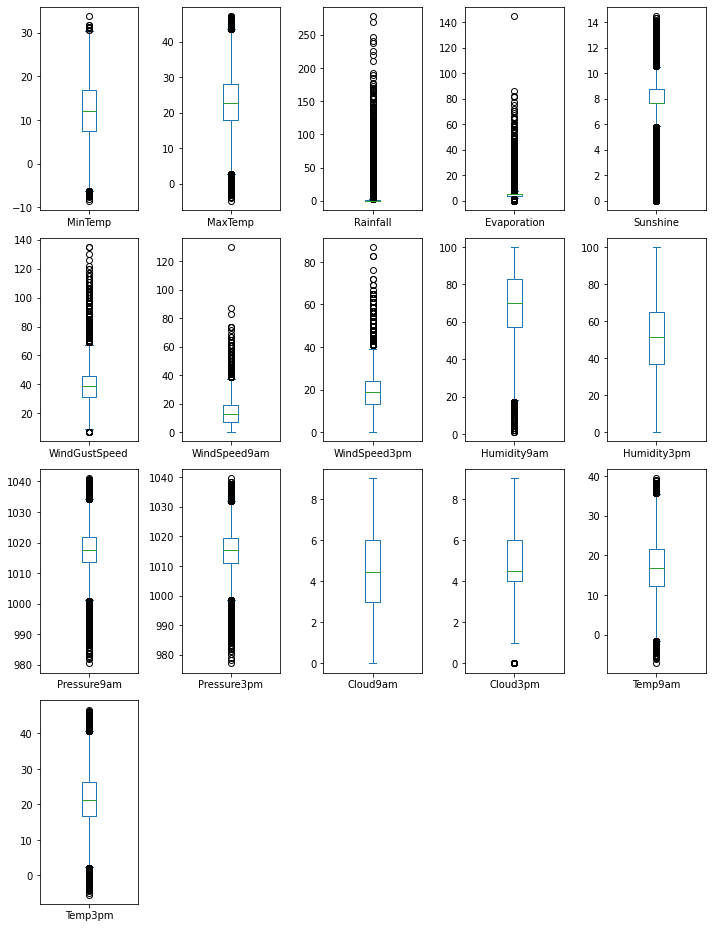

In [105]:
df_outlier.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           100000 non-null  object 
 1   Location       100000 non-null  float64
 2   MinTemp        100000 non-null  float64
 3   MaxTemp        100000 non-null  float64
 4   Rainfall       100000 non-null  float64
 5   Evaporation    100000 non-null  float64
 6   Sunshine       100000 non-null  float64
 7   WindGustDir    100000 non-null  float64
 8   WindGustSpeed  100000 non-null  float64
 9   WindDir9am     100000 non-null  float64
 10  WindDir3pm     100000 non-null  float64
 11  WindSpeed9am   100000 non-null  float64
 12  WindSpeed3pm   100000 non-null  float64
 13  Humidity9am    100000 non-null  float64
 14  Humidity3pm    100000 non-null  float64
 15  Pressure9am    100000 non-null  float64
 16  Pressure3pm    100000 non-null  float64
 17  Cloud9am       100000 non-null

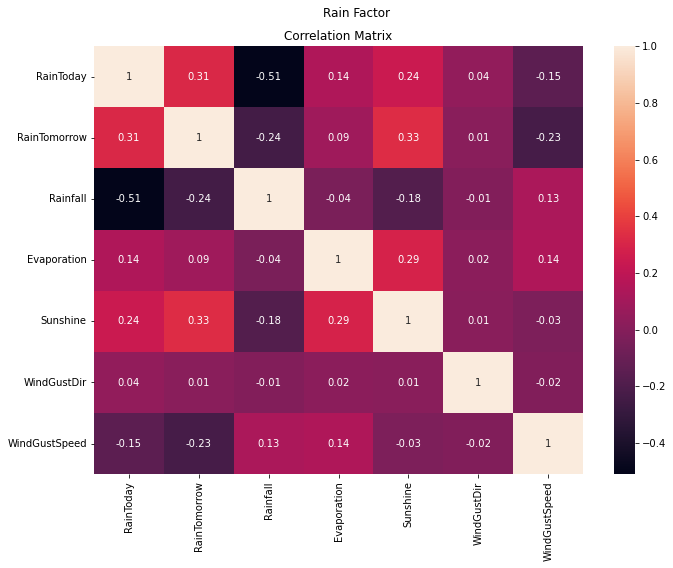

In [114]:
df_indep = pd.DataFrame(df[['RainToday','RainTomorrow','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Rain Factor')
plt.tight_layout()

*Korelasi antara hujan dan terangnya cuaca menunjukkan adanya sedikit pengaruh*

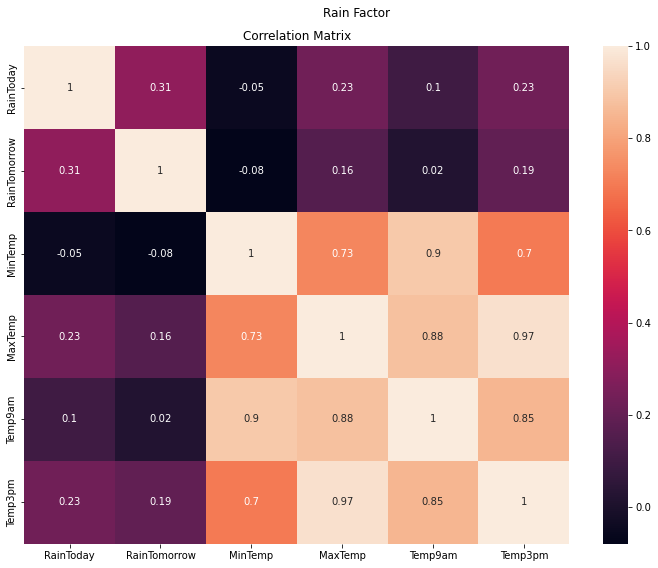

In [116]:
df_indep = pd.DataFrame(df[['RainToday','RainTomorrow','MinTemp','MaxTemp','Temp9am','Temp3pm']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Rain Factor')
plt.tight_layout()

*Cuaca hujan menunjukkan adanya sedikit korelasi dengan temperatur pada jam tertentu*

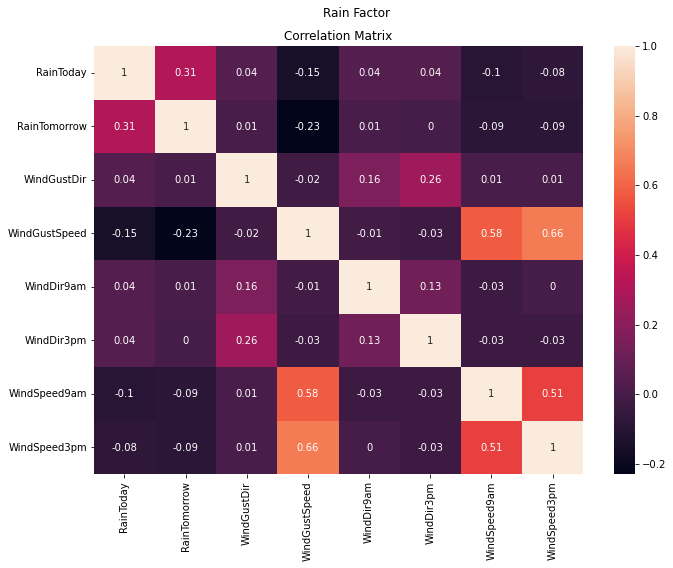

In [117]:
df_indep = pd.DataFrame(df[['RainToday','RainTomorrow','WindGustDir','WindGustSpeed','WindDir9am',
                            'WindDir3pm','WindSpeed9am','WindSpeed3pm']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Rain Factor')
plt.tight_layout()

Cuaca Hujan menunjukkan korelasi sangat sedikit dengan angin

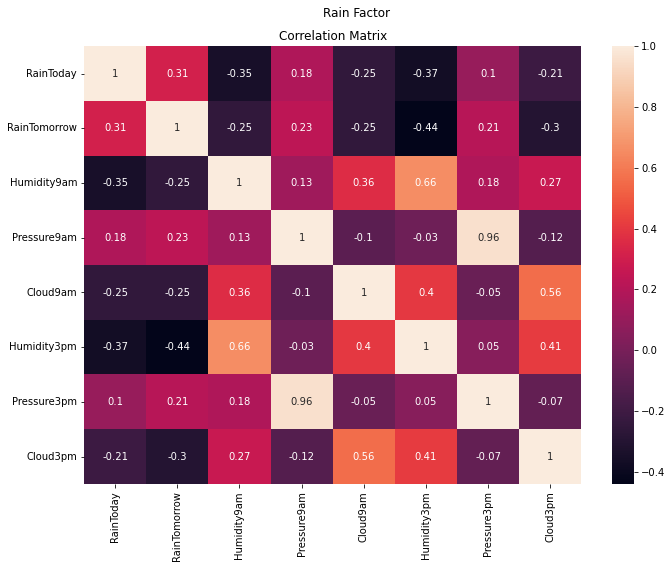

In [118]:
df_indep = pd.DataFrame(df[['RainToday','RainTomorrow','Humidity9am','Pressure9am','Cloud9am',
                           'Humidity3pm','Pressure3pm','Cloud3pm']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Rain Factor')
plt.tight_layout()

Cuaca hujan menunjukkan sedikit pengaruh terhadap tekanan udara

# Split Data

In [132]:
X = df.drop(['RainTomorrow'],axis=1)
Y = df['RainTomorrow']

In [133]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.02, random_state = 0)

# Decision Tree

In [134]:
from sklearn import tree
df_decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.01)#build
df_decision_tree.fit(X_train,Y_train)#train
df_decision_tree.score(X_test,Y_test)#predict

y_pred = df_decision_tree.predict(X_test)
df_decision_tree.score(X_test,Y_test)

0.815

In [135]:
y_pred = df_decision_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 230,  246],
       [ 124, 1400]], dtype=int64)

In [136]:
feature_names = X.columns
feature_names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [137]:
from sklearn.tree import export_graphviz
export_graphviz(df_decision_tree, out_file="Decision_Tree_Survived.dot", class_names=["Rain","NotRain"],
               feature_names=feature_names, impurity=False, filled=True)

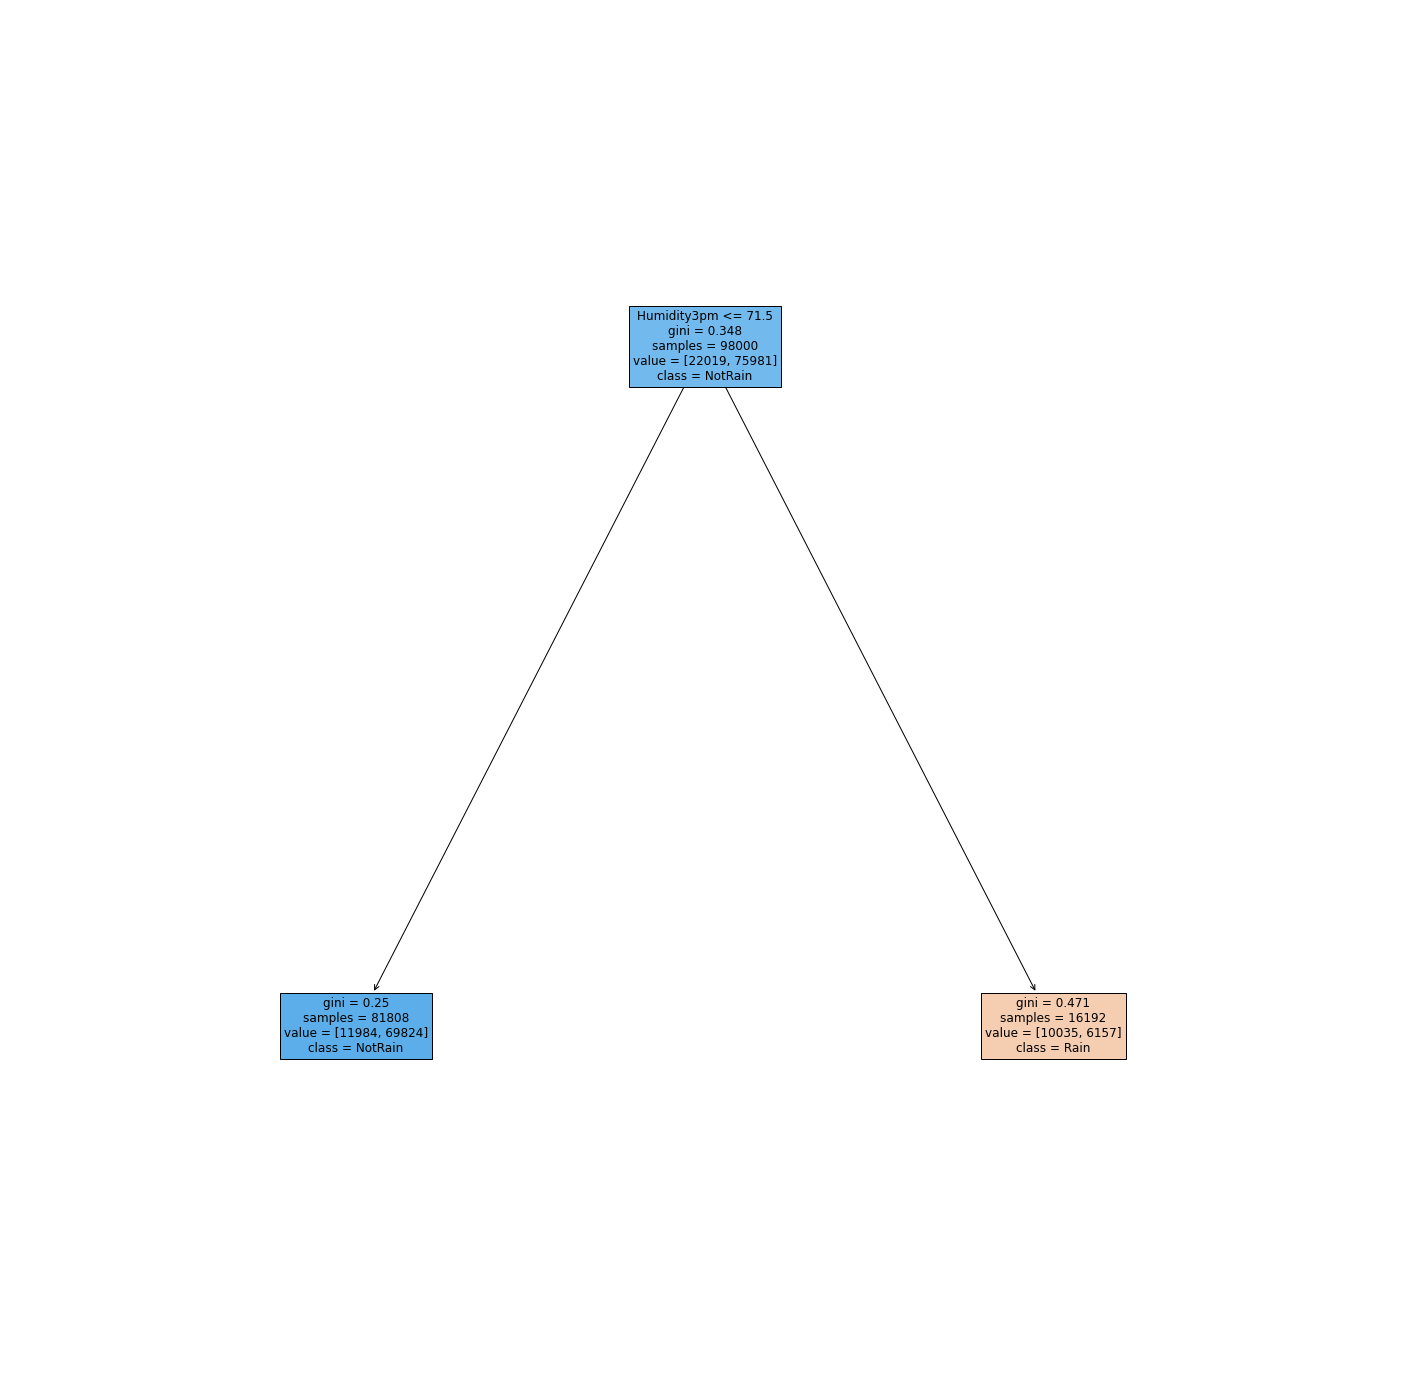

In [138]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure (figsize=(25,25))
_=tree.plot_tree(df_decision_tree, 
                   feature_names= feature_names,
                  class_names={0: 'Rain',1: 'NotRain'},
                   filled=True,
                   fontsize=12)

In [139]:
df.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,17.7,25.9,2.2,1.6,7.627004,0.0,31.0,6.0,15.0,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,0.0,1.0


In [142]:
df_decision_tree.predict([[0,17,7,25,9,2.2,1.6,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])

# RandomForest

In [143]:
from sklearn import ensemble
R_forest = ensemble.RandomForestClassifier(n_estimators=100)
R_forest.fit(X_train,Y_train)
R_forest.score(X_test,Y_test)

0.858

In [144]:
y_pred = R_forest.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 254,  222],
       [  62, 1462]], dtype=int64)

In [146]:
R_forest.predict([[0,17,7,25,9,2.2,1.6,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

# Gradient Boosting

In [147]:
Grad_B = ensemble.GradientBoostingClassifier()
Grad_B.fit(X_train,Y_train)
Grad_B.score(X_test,Y_test)

0.8545

In [151]:
y_pred = Grad_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 251,  225],
       [  66, 1458]], dtype=int64)

In [148]:
Grad_B.predict([[0,17,7,25,9,2.2,1.6,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1.])

# Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB
Naive_B = GaussianNB()
Naive_B.fit(X_train,Y_train)
Naive_B.score(X_test,Y_test)

0.812

In [150]:
y_pred = Naive_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 298,  178],
       [ 198, 1326]], dtype=int64)

In [155]:
Naive_B.predict([[0,17,7,25,9,2.2,1.6,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0.])

# K-Nearest Neighbor

In [152]:
from sklearn.neighbors import KNeighborsClassifier
K_Nearest_N = KNeighborsClassifier(n_neighbors=3)
K_Nearest_N.fit(X_train,Y_train)
K_Nearest_N.score(X_test,Y_test)

0.8325

In [153]:
y_pred = K_Nearest_N.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 249,  227],
       [ 108, 1416]], dtype=int64)

In [154]:
K_Nearest_N.predict([[0,17,7,25,9,2.2,1.6,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.])

# Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train,Y_train)
Logistic_R.score(X_test,Y_test)

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.839

In [157]:
y_pred = Logistic_R.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 228,  248],
       [  74, 1450]], dtype=int64)

In [158]:
Logistic_R.predict([[0,17,7,25,9,2.2,1.6,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

# Kesimpulan

- *Keadaan Hujan berpengaruh terhadap **banyak** sekali faktor*
- *Machine Learning yang dapat digunakan sesuai score diatas adalah **Random Forest**, karena memiliki tingkat keakuratan paling tinggi yaitu **85.8 %**.*